In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler

#model selection from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#ensemble
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
#metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#pca
from sklearn.decomposition import PCA
#data_balance
from sklearn.utils import resample
#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [37]:
df.shape

(233154, 41)

In [38]:
df.drop(['UniqueID','MobileNo_Avl_Flag'],axis=1,inplace=True)

### Attribute description

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03
Aadhar_flag,233154.0,0.840320,3.663097e-01,0.00,1.00,1.0,1.00,1.000000e+00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 39 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                  

## Data Wrangling

In [41]:
temp_col = ['PERFORM_CNS.SCORE.DESCRIPTION']
df[temp_col] = df[temp_col].replace('No Bureau History Available', 0)
df[temp_col] = df[temp_col].replace('Not Scored: Sufficient History Not Available',0)
df[temp_col] = df[temp_col].replace('Not Scored: Not Enough Info available on the customer',0)
df[temp_col] = df[temp_col].replace('Not Scored: No Activity seen on the customer (Inactive)',0) 
df[temp_col] = df[temp_col].replace('Not Scored: No Updates available in last 36 months',0) 
df[temp_col] = df[temp_col].replace('Not Scored: Only a Guarantor', 0)
df[temp_col] = df[temp_col].replace('Not Scored: More than 50 active Accounts found',0)
df[temp_col] = df[temp_col].replace('M-Very High Risk', 1)
df[temp_col] = df[temp_col].replace('L-Very High Risk', 1)
df[temp_col] = df[temp_col].replace('K-High Risk', 2)
df[temp_col] = df[temp_col].replace('J-High Risk', 2)
df[temp_col] = df[temp_col].replace('I-Medium Risk', 3)
df[temp_col] = df[temp_col].replace('H-Medium Risk', 3)
df[temp_col] = df[temp_col].replace('G-Low Risk', 4)
df[temp_col] = df[temp_col].replace('F-Low Risk', 4)
df[temp_col] = df[temp_col].replace('E-Low Risk', 4)
df[temp_col] = df[temp_col].replace('D-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('C-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('B-Very Low Risk', 5)
df[temp_col] = df[temp_col].replace('A-Very Low Risk', 5)

In [42]:
df['Employment.Type'].fillna('Others',inplace=True)
df['Employment.Type'].value_counts()
df['Employment.Type']=df['Employment.Type'].replace({'Self employed':0, 'Salaried':1 ,'Others':2})

In [43]:
df.rename(columns={'Employment.Type':'Employment_Type'},inplace=True)

In [44]:
def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

In [45]:
df['Avg_Loan_tenure'] = df['AVERAGE.ACCT.AGE'].apply(duration)
df['Time_since_1st_loan'] = df['CREDIT.HISTORY.LENGTH'].apply(duration)

In [46]:
df.drop(['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],axis=1,inplace=True)

In [47]:
def age(dur):
    yr = int(dur.split('-')[2])
    if yr >=0 and yr<=19:
        return yr+2000
    else:
         return yr+1900

df['Date.of.Birth'] = df['Date.of.Birth'].apply(age)
df['DisbursalDate'] = df['DisbursalDate'].apply(age)

In [48]:
df['Age_at_disbursal']=df['DisbursalDate']-df['Date.of.Birth']

In [49]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment_Type,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Avg_Loan_tenure,Time_since_1st_loan,Age_at_disbursal
0,50578,58400,89.55,67,22807,45,1441,1984,1,2018,...,0,0,0,0,0,0,0,0,0,34
1,47145,65550,73.23,67,22807,45,1502,1985,0,2018,...,0,1991,0,0,1,0,1,23,23,33
2,53278,61360,89.63,67,22807,45,1497,1985,0,2018,...,0,0,0,0,0,0,0,0,0,33
3,57513,66113,88.48,67,22807,45,1501,1993,0,2018,...,0,31,0,0,0,1,1,8,15,25
4,52378,60300,88.39,67,22807,45,1495,1977,0,2018,...,0,0,0,0,0,1,1,0,0,41


## Base Model

In [50]:
y=df.loan_default
X=df.drop("loan_default",axis=1)
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [52]:
# for Test set
model_score = lr.score(X_test,y_test)
print(model_score)

0.7826926101190902


In [53]:
# for train set
model_score = lr.score(X_train,y_train)
print(model_score)

0.7829075958751769


In [54]:
print("precision :",precision_score(y_test,y_pred),"\n")
print("f1 score:",f1_score(y_test,y_pred),"\n")

precision : 0.0 

f1 score: 0.0 



In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54756
           1       0.00      0.00      0.00     15191

   micro avg       0.78      0.78      0.78     69947
   macro avg       0.39      0.50      0.44     69947
weighted avg       0.61      0.78      0.69     69947



In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[54747,     9],
       [15191,     0]], dtype=int64)

# DT

In [57]:
 # Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [58]:

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [59]:
from sklearn import metrics
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.669721360458633


In [60]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Precision: 0.2602291325695581
Recall: 0.28260154038575475
F1 score: 0.27095430446856855


# Random forest

In [61]:
classifier=RandomForestClassifier(n_estimators=40)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [62]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7785037242483595


In [63]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Precision: 0.40792682926829266
Recall: 0.0440392337568297
F1 score: 0.07949616778563365


# DT with adaboost

In [64]:
#Adaboost classifier for Decision tree:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [65]:
predictions = classifier.predict(X_test)

In [66]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7825210516533947


In [67]:
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1 score:", f1_score(y_test, predictions))

Precision: 0.47789473684210526
Recall: 0.014943058389836087
F1 score: 0.028979956593897613


# eda

In [69]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment_Type,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Avg_Loan_tenure,Time_since_1st_loan,Age_at_disbursal
0,50578,58400,89.55,67,22807,45,1441,1984,1,2018,...,0,0,0,0,0,0,0,0,0,34
1,47145,65550,73.23,67,22807,45,1502,1985,0,2018,...,0,1991,0,0,1,0,1,23,23,33
2,53278,61360,89.63,67,22807,45,1497,1985,0,2018,...,0,0,0,0,0,0,0,0,0,33
3,57513,66113,88.48,67,22807,45,1501,1993,0,2018,...,0,31,0,0,0,1,1,8,15,25
4,52378,60300,88.39,67,22807,45,1495,1977,0,2018,...,0,0,0,0,0,1,1,0,0,41


In [5]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [3]:
new = df.sample(50000)
new.head()


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
195981,533614,55259,69630,81.86,34,15271,86,997,30-07-92,Self employed,...,0,0,2100,0,2,0,0yrs 10mon,2yrs 2mon,0,0
94667,564860,45849,84523,56.20,1,23861,49,6087,16-12-93,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
52876,517353,56213,70000,83.14,2,15899,45,1720,06-06-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
102614,450485,42394,66926,64.25,64,22076,86,3523,01-01-80,Self employed,...,0,0,5618,0,0,0,1yrs 1mon,1yrs 6mon,2,0
109098,448096,49303,74864,68.12,152,13890,86,5015,01-12-79,Self employed,...,0,0,0,0,1,0,0yrs 9mon,1yrs 1mon,0,0


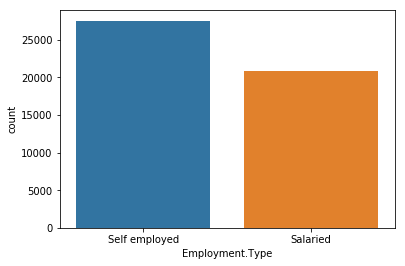

In [5]:
sns.countplot(new['Employment.Type'])

In [8]:
new['Employment.Type'].value_counts()

Self employed    27512
Salaried         20874
Name: Employment.Type, dtype: int64

In [9]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 7304 to 41039
Data columns (total 41 columns):
UniqueID                               50000 non-null int64
disbursed_amount                       50000 non-null int64
asset_cost                             50000 non-null int64
ltv                                    50000 non-null float64
branch_id                              50000 non-null int64
supplier_id                            50000 non-null int64
manufacturer_id                        50000 non-null int64
Current_pincode_ID                     50000 non-null int64
Date.of.Birth                          50000 non-null object
Employment.Type                        48363 non-null object
DisbursalDate                          50000 non-null object
State_ID                               50000 non-null int64
Employee_code_ID                       50000 non-null int64
MobileNo_Avl_Flag                      50000 non-null int64
Aadhar_flag                            5000

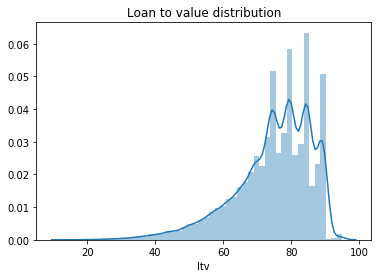

In [17]:
sns.distplot(new['ltv'], kde=True)
plt.title('Loan to value distribution')
plt.savefig('ltv.png')
plt.show()

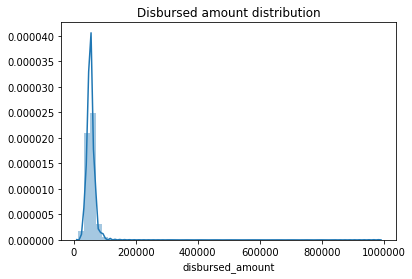

In [13]:
sns.distplot(new['disbursed_amount'], kde=True)
plt.title('Disbursed amount distribution')
plt.savefig('dis.png')
plt.show()

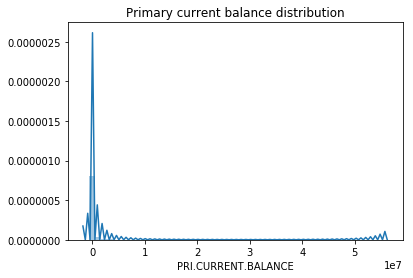

In [12]:
sns.distplot(new['PRI.CURRENT.BALANCE'], kde=True)
plt.title('Primary current balance distribution')
plt.savefig('pcb.png')
plt.show()

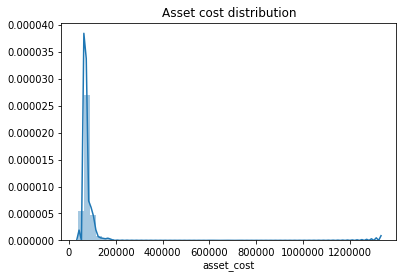

In [14]:
sns.distplot(new['asset_cost'], kde=True)
plt.title('Asset cost distribution')
plt.savefig('asset.png')
plt.show()

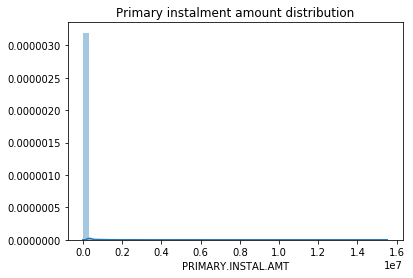

In [16]:
sns.distplot(new['PRIMARY.INSTAL.AMT'], kde=True)
plt.title('Primary instalment amount distribution')
plt.savefig('pia.png')
plt.show()

# categorical variables:

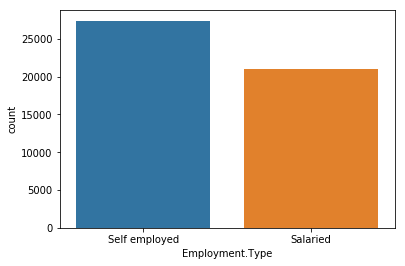

In [19]:
sns.countplot(new['Employment.Type'])

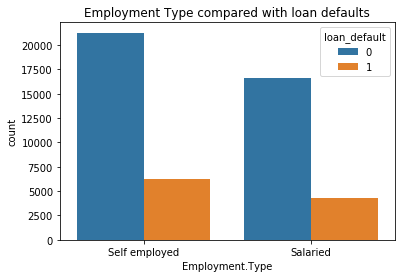

In [18]:
sns.countplot(new['Employment.Type'], hue=new['loan_default'])
plt.title('Employment Type compared with loan defaults')
plt.savefig('type1.png')
plt.show()

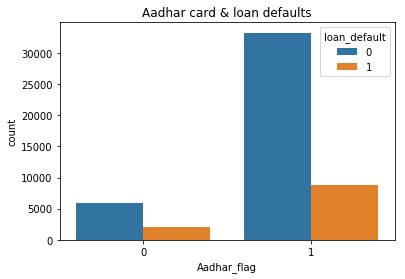

In [19]:
sns.countplot(new['Aadhar_flag'], hue=new['loan_default'])
plt.title('Aadhar card & loan defaults')
plt.savefig('ada.png')
plt.show()

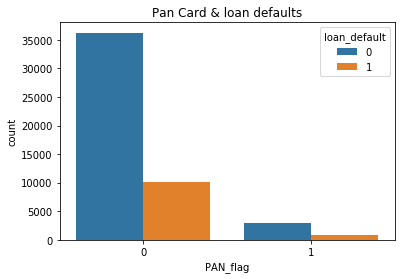

In [20]:
sns.countplot(new['PAN_flag'], hue=new['loan_default'])
plt.title('Pan Card & loan defaults')
plt.savefig('pan.png')
plt.show()

From this plot we can infer that most of the loan defaults doesnt have PAN card details. And people with no pan
card details have the high possiblity of being a non-loan defaulter.

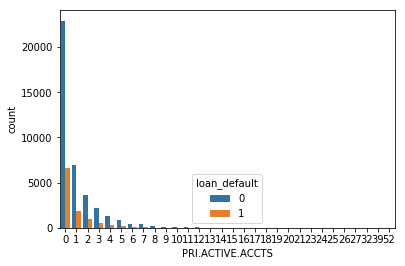

In [27]:
sns.countplot(new['PRI.ACTIVE.ACCTS'], hue=new['loan_default'])

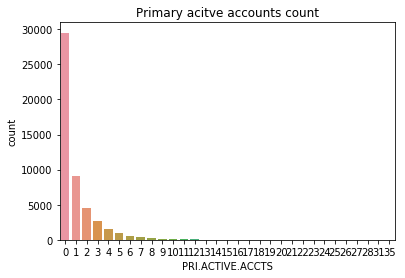

In [21]:
sns.countplot(new['PRI.ACTIVE.ACCTS'])
plt.title('Primary acitve accounts count')
plt.savefig('pac.png')
plt.show()

There are more than 25000 active accounts of category 0 in primary active accounts variable.

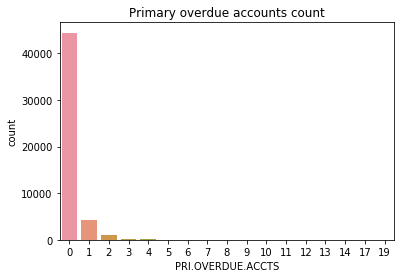

In [32]:
sns.countplot(new['PRI.OVERDUE.ACCTS'])
plt.title('Primary overdue accounts count')
plt.show()

In [24]:
new.drop(new.loc[new['disbursed_amount']>100000].index,inplace=True)

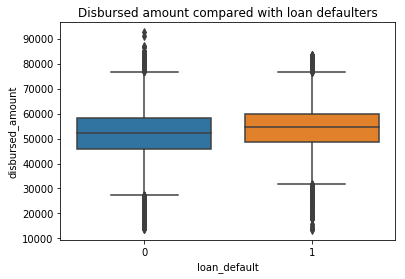

In [31]:
sns.boxplot(y=new['disbursed_amount'], x=new['loan_default'])
plt.title('Disbursed amount compared with loan defaulters')
plt.savefig('da.png')

In [26]:
new.drop(new.loc[new['asset_cost']>100000].index,inplace=True)

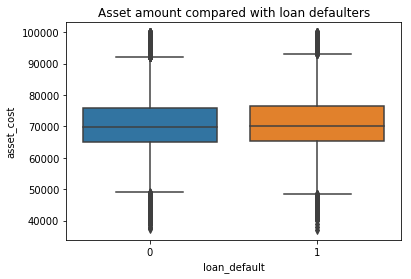

In [32]:
sns.boxplot(y=new['asset_cost'], x=new['loan_default'])
plt.title('Asset amount compared with loan defaulters')
plt.savefig('asset1.png')

In [29]:
df.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,-0.006537,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657
